# Canvas Widget

In [1]:
import napari
import numpy as np
from biaplotter.plotter import CanvasWidget
from napari.utils import nbscreenshot

## Adding Canvas Widget to napari

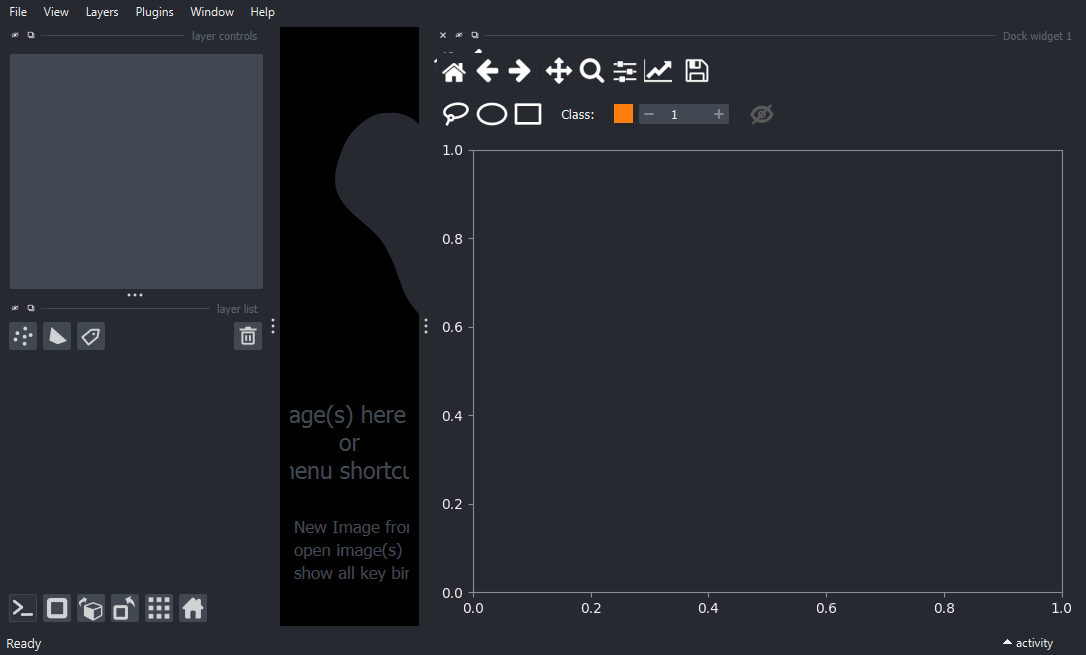

In [2]:
viewer = napari.Viewer()
canvas_widget = CanvasWidget(viewer)
viewer.window.add_dock_widget(canvas_widget)
nbscreenshot(viewer)

Check canvas_widget default artists and selectors

In [3]:
canvas_widget.artists

{'SCATTER': <biaplotter.artists.Scatter at 0x2a9d71194d0>,
 'HISTOGRAM2D': <biaplotter.artists.Histogram2D at 0x2a9d8c6bf10>}

In [4]:
canvas_widget.selectors

{'LASSO': <biaplotter.selectors.InteractiveLassoSelector at 0x2a9d8cbe190>,
 'ELLIPSE': <biaplotter.selectors.InteractiveEllipseSelector at 0x2a9d8cb1490>,
 'RECTANGLE': <biaplotter.selectors.InteractiveRectangleSelector at 0x2a9d8cb1890>}

## Generate some data

In [5]:
def generate_gaussian_data(n_samples):
    """Generate a 2D dataset with two Gaussian clusters."""
    # Gaussian 1
    x1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    y1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    # Gaussian 2
    x2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    y2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    x_data = np.concatenate([x1, x2])
    y_data = np.concatenate([y1, y2])
    return np.vstack([x_data, y_data]).T

In [6]:
n_samples = 1000
data = generate_gaussian_data(n_samples)

Histogram2D artist is the default active artist.

In [7]:
canvas_widget.active_artist

## Adding data to the canvas

Adding data to artist will update the histogram.

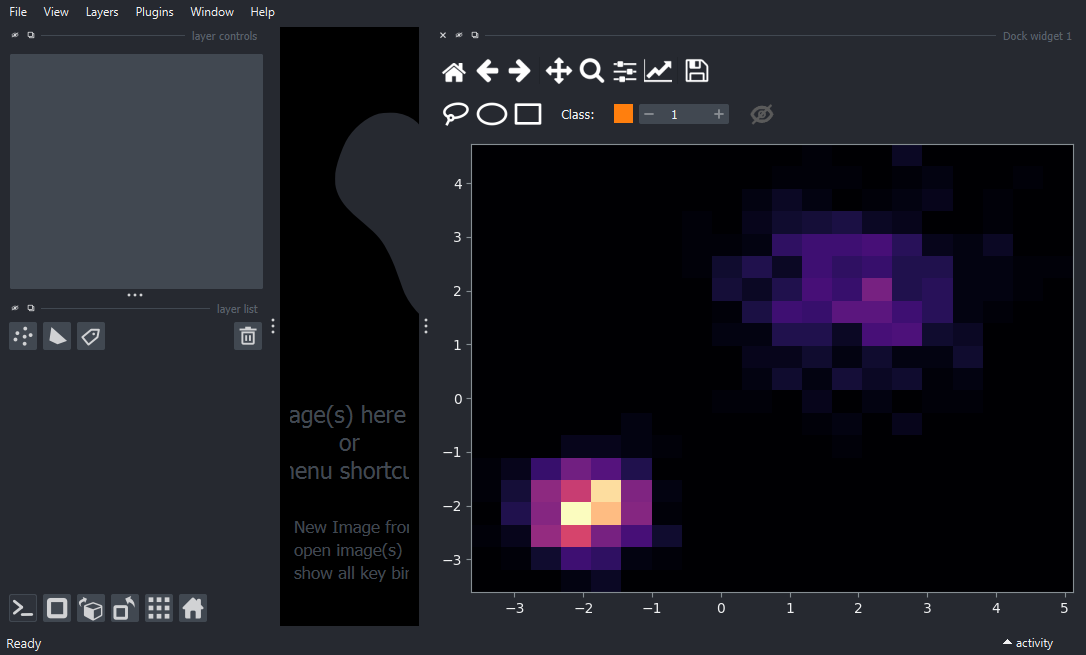

In [8]:
canvas_widget.active_artist.data = data
nbscreenshot(viewer)

Similarly, changing the active artist to `SCATTER` and adding data to it will update the scatter plot.

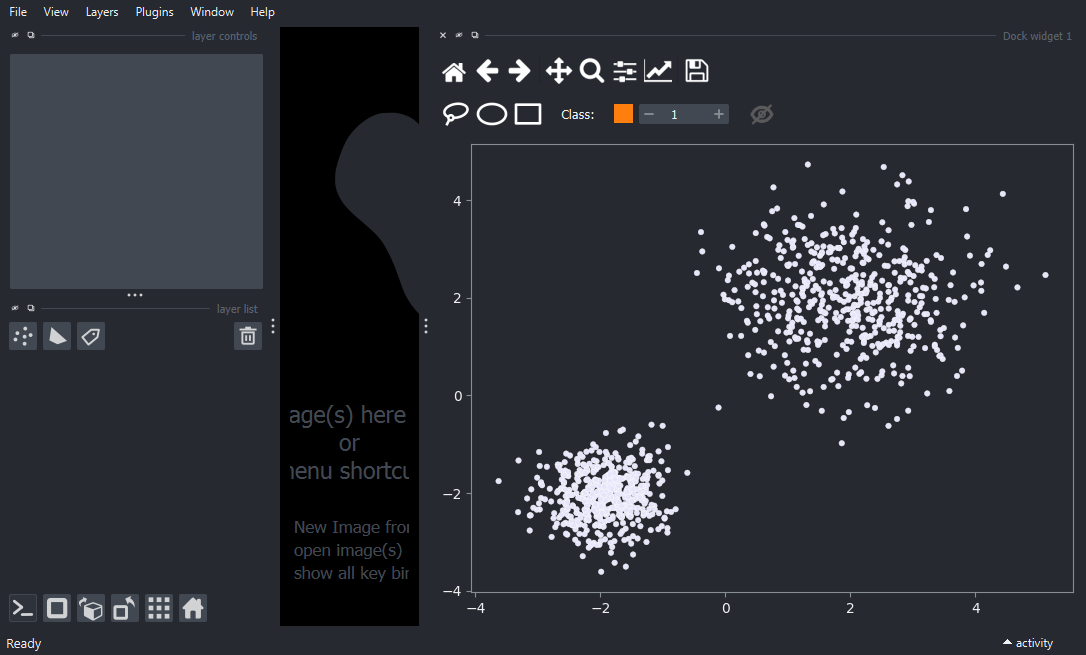

In [9]:
canvas_widget.active_artist = 'SCATTER'
canvas_widget.active_artist.data = data
nbscreenshot(viewer)

To go back to the histogram, change the active artist to `HISTOGRAM2D`.

In [10]:
canvas_widget.active_artist = 'HISTOGRAM2D'

## Manually selecting data

### Lasso Selector

Selecting data using lasso selector will update the active artist plot.

![](../images/lasso_selector.gif)

### Ellipse Selector

Ellipse selector produces an interactive ellipse that can be dragged and expanded before being applied.

Right-clicking applies the current class to the selected data.

![](../images/ellipse_selector.gif)

### Rectangle Selector

Rectangle selector produces an interactive rectangle that can be dragged and expanded as well.

One way to clear previuos selections is to apply class `0` to the selected data.

![](../images/rectangle_selector.gif)